In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
data=pd.read_csv("loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# DATA ANALYSIS

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# DATA CLEANING

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
col=["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


In [13]:
#Converting object datatype values into numeric
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=700:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 8


In [14]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
data.rename(columns={'Loan_ID':'Loanid', 'Gender':'Gender', 'Married':'married', 'Dependents':'dependents', 'Education':'eductaion',
       'Self_Employed':'selfemployed', 'ApplicantIncome':'applicantincome', 'CoapplicantIncome':'coapplicatincome', 'LoanAmount':'loanamount',
       'Loan_Amount_Term':'loanamountterm', 'Credit_History':'credithistory', 'Property_Area':'propertyarea', 'Loan_Status':'loanstatus'},inplace=True)

In [17]:
data

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
data.corr()

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
Loanid,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
eductaion,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
selfemployed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
applicantincome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
coapplicatincome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
loanamount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
loanamountterm,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [19]:
data.skew()

Loanid              0.000000
Gender             -1.648795
married            -0.644850
dependents          1.015551
eductaion           1.367622
selfemployed        2.159796
applicantincome     6.539513
coapplicatincome    7.491531
loanamount          2.745407
loanamountterm     -2.402112
credithistory      -2.021971
propertyarea       -0.066196
loanstatus         -0.809998
dtype: float64

# VISUALIZATION

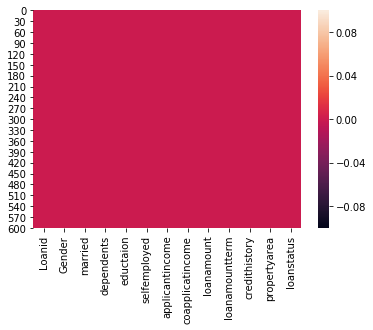

In [20]:
sns.heatmap(data.isnull())

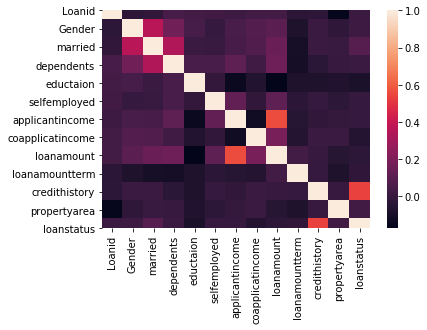

In [21]:
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235E3A9C888>,
      dtype=object)

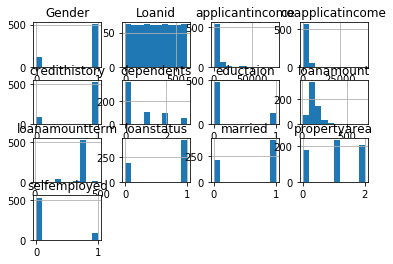

In [22]:
data.hist()

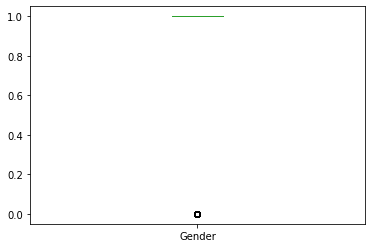

In [23]:
#Checking outliers
data['Gender'].plot.box()

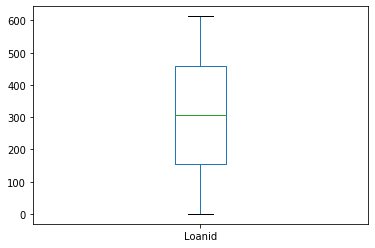

In [24]:
data['Loanid'].plot.box()

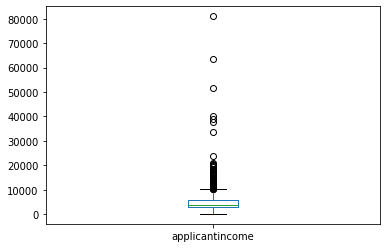

In [25]:
data['applicantincome'].plot.box()

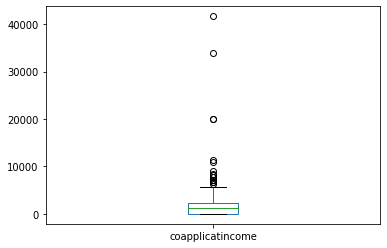

In [26]:
data['coapplicatincome'].plot.box()

In [27]:
 #Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [28]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [29]:
data_new=data[(z<3).all(axis=1)]
data_new

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [30]:
data.shape

(614, 13)

In [31]:
data_new.shape

(577, 13)

In [32]:
data_new.skew()

Loanid              0.010879
Gender             -1.622920
married            -0.630211
dependents          1.052106
eductaion           1.306588
selfemployed        2.252848
applicantincome     2.148522
coapplicatincome    1.350517
loanamount          1.163426
loanamountterm     -2.098806
credithistory      -1.976043
propertyarea       -0.055332
loanstatus         -0.822635
dtype: float64

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING


In [33]:
x=data_new.drop('loanstatus',axis=1)
x

,Loanid,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.72210857,  0.47713685, -1.36251079, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ...,  0.23085296,
         0.41851254, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  0.23085296,
        -2.38941464, -0.03952504]])

In [35]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.722109,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,-0.267707,0.230853,0.418513,1.227472
1,-1.716445,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.125325,0.230853,0.418513,-1.306522
2,-1.710782,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.228788,0.230853,0.418513,1.227472
3,-1.705118,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.267707,0.230853,0.418513,1.227472
4,-1.699455,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.106046,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1.726889,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.596048,-0.861036,-1.139799,0.230853,0.418513,-1.306522
573,1.732552,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.189012,-0.861036,-1.691530,-3.243986,0.418513,-1.306522
574,1.738215,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.149549,-0.715592,2.099399,0.230853,0.418513,1.227472
575,1.743879,0.477137,0.733939,1.288020,-0.541961,-0.380580,0.984507,-0.861036,0.924745,0.230853,0.418513,1.227472


In [36]:
y=data_new['loanstatus']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loanstatus, Length: 577, dtype: int32

# Apply Model and Algorithms


In [37]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=12)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(432, 12)
(432,)
(145, 12)
(145,)


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

In [58]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.896551724137931
[[ 20  14]
 [  1 110]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.73        34
           1       0.89      0.99      0.94       111

    accuracy                           0.90       145
   macro avg       0.92      0.79      0.83       145
weighted avg       0.90      0.90      0.89       145



In [49]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.81034483 0.79310345 0.78448276 0.86086957 0.84210526]
Mean Scores 0.8181811725716088
Standard Deviation 0.029053552755050584
Y Prediction values
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 

0.8180242634315424

In [50]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.80172414 0.78448276 0.77586207 0.85217391 0.84210526]
Mean Scores 0.8112696283437228
Standard Deviation 0.030614849073906093
Y Prediction values
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 

0.8110918544194108

In [51]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.6045977  0.43467162 0.70354144 0.61669638 0.53219697]
Mean Scores 0.5783408213995676
Standard Deviation 0.09011754803949529
Y Prediction values
[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 1 0

0.6187175043327556

In [52]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.70927318 0.66070848 0.66857143 0.76063039 0.76328904]
Mean Scores 0.712494503978954
Standard Deviation 0.04363153337125808
Y Prediction values
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 

0.7937608318890814

In [53]:
rfc=RandomForestClassifier()
score=cross_val_score(rfc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(rfc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.5800905  0.70583263 0.65444273 0.72488038 0.60627943]
Mean Scores 0.6543051353363852
Standard Deviation 0.05558821353304349
Y Prediction values
[1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0

0.708838821490468

In [54]:
gbc=GradientBoostingClassifier()
score=cross_val_score(gbc,x,y,cv=5,scoring='accuracy')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(gbc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.62068966 0.68965517 0.77586207 0.82608696 0.34210526]
Mean Scores 0.6508798232462716
Standard Deviation 0.16974970056220717
Y Prediction values
[0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 0

0.6533795493934142

In [56]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [59]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.84581723, 0.84544158, 0.80344517, 0.08877819, 0.63126292,
       0.7556991 , 0.83663997, 0.82160301, 0.75938376, 0.82432662,
       0.88280559, 0.80614531, 0.90629407, 0.8498313 , 0.71187806,
       0.75928175, 0.65333787, 0.63430078, 0.65184426, 0.78407498,
       0.81522066, 0.79812547, 0.09274531, 0.82890536, 0.80161438,
       0.52294934, 0.88771325, 0.77190382, 0.77052787, 0.73571407,
       0.70952268, 0.81430257, 0.76485976, 0.78747305, 0.69913472,
       0.12089166, 0.73294243, 0.80076665, 0.7796913 , 0.77856862,
       0.85988038, 0.83556014, 0.72729512, 0.78911213, 0.75145064,
       0.7943723 , 0.7254988 , 0.1472798 , 0.83929285, 0.09971103,
       0.84538316, 0.86188309, 0.83305569, 0.84971251, 0.065236  ,
       0.80781468, 0.61212543, 0.70624   , 0.83836778, 0.7250918 ,
       0.84302191, 0.69086792, 0.83595479, 0.87754226, 0.7603738 ,
       0.68144669, 0.75598162, 0.768784  , 0.08049934, 0.14233431,
       0.78688043, 0.83126205, 0.12563   , 0.89359908, 0.75480

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.02941176 0.02941176 0.05882353
 0.05882353 0.08823529 0.08823529 0.11764706 0.11764706 0.14705882
 0.14705882 0.17647059 0.17647059 0.20588235 0.20588235 0.23529412
 0.23529412 0.26470588 0.26470588 0.32352941 0.32352941 0.35294118
 0.35294118 0.38235294 0.38235294 0.47058824 0.47058824 1.        ]
[0.         0.00900901 0.01801802 0.01801802 0.0990991  0.0990991
 0.10810811 0.10810811 0.32432432 0.32432432 0.36936937 0.36936937
 0.38738739 0.38738739 0.55855856 0.55855856 0.63963964 0.63963964
 0.74774775 0.74774775 0.76576577 0.76576577 0.8018018  0.8018018
 0.82882883 0.82882883 0.99099099 0.99099099 1.         1.        ]
[1.90629407 0.90629407 0.89359908 0.88771325 0.86076165 0.85988038
 0.85848766 0.85421259 0.82432662 0.82160301 0.80997842 0.80781468
 0.80610468 0.80514874 0.7796913  0.77856862 0.76485976 0.76044343
 0.72950523 0.72729512 0.7250918  0.71944395 0.71187806 0.70952268
 0.70471146 0.69913472 0.54706266 0.14233431 0.14006728 0.0467

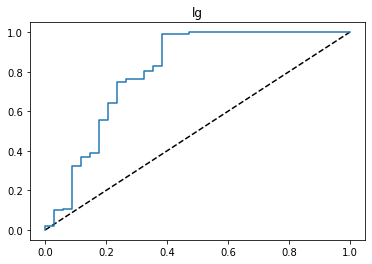

In [61]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="lg")
plt.title("lg")
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.789613142554319


In [63]:
#save the model
from sklearn.externals import joblib
joblib.dump(lg,"loan.pkl")

['loan.pkl']